In [2]:
import torch
from memflow.phasespace.phasespace import PhaseSpace
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np
from  memflow.phasespace.utils import *
torch.set_default_dtype(torch.double)

In [3]:
E_CM = 13000
phasespace = PhaseSpace(E_CM, [21,21], [25,6,-6])

2023-03-15 17:10:03.431693: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/opt/LHAPDF/lib:/opt/MG5_aMC_v3_4_1/lib:/.singularity.d/libs
2023-03-15 17:10:03.431985: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)


In [11]:
help(phasespace)

Help on PhaseSpace in module memflow.phasespace.phasespace object:

class PhaseSpace(builtins.object)
 |  PhaseSpace(E_cm, initial_pdgs, final_pdgs, pdf=None)
 |  
 |  Methods defined here:
 |  
 |  __init__(self, E_cm, initial_pdgs, final_pdgs, pdf=None)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  generate_random_phase_space_points(self, N, pT_mincut=-1, delR_mincut=-1, rap_maxcut=-1)
 |      Generate N random phase space points from the CM of E_cm energy,
 |      representing n final state particles with final_masses mass.
 |  
 |  get_momenta_from_ps(self, points, pT_mincut=-1, delR_mincut=-1, rap_maxcut=-1)
 |  
 |  get_ps_from_momenta(self, momenta, x1, x2)
 |  
 |  get_uniform_from_x1x2(self, x1, x2)
 |  
 |  get_x1x2_from_uniform(self, r)
 |      Transform a pair of uniformally distributed variables r (N,2),
 |      in x1, x2 pairs keeping into account the minimum energy constraint
 |      given by E_cm and finalstate total mass.
 |      The j

In [29]:
points_out, momenta, weight, x1, x2 = phasespace.generate_random_phase_space_points(10000)

Text(0.5, 0, 'Pz')

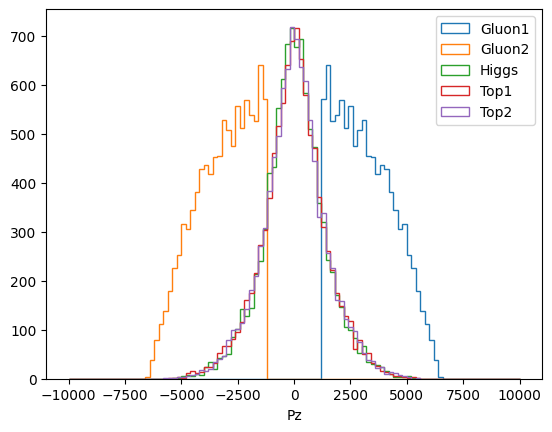

In [30]:
plt.hist(momenta[:,0,3], bins=100, range=(-1e4,1e4), histtype="step", label="Gluon1")
plt.hist(momenta[:,1,3], bins=100, range=(-1e4,1e4), histtype="step", label="Gluon2")
plt.hist(momenta[:,2,3], bins=100, range=(-1e4,1e4), histtype="step", label="Higgs")
plt.hist(momenta[:,3,3], bins=100, range=(-1e4,1e4), histtype="step", label="Top1")
plt.hist(momenta[:,4,3], bins=100, range=(-1e4,1e4), histtype="step", label="Top2")
plt.legend()
plt.xlabel("Pz")

Text(0.5, 0, 'Px')

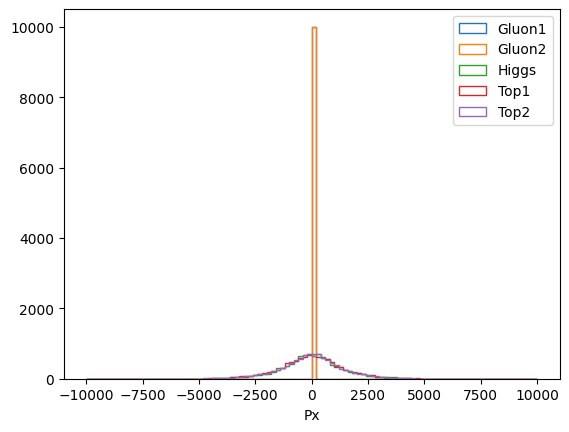

In [33]:
plt.hist(momenta[:,0,1], bins=100, range=(-1e4,1e4), histtype="step", label="Gluon1")
plt.hist(momenta[:,1,1], bins=100, range=(-1e4,1e4), histtype="step", label="Gluon2")
plt.hist(momenta[:,2,1], bins=100, range=(-1e4,1e4), histtype="step", label="Higgs")
plt.hist(momenta[:,3,1], bins=100, range=(-1e4,1e4), histtype="step", label="Top1")
plt.hist(momenta[:,4,1], bins=100, range=(-1e4,1e4), histtype="step", label="Top2")
plt.legend()
plt.xlabel("Px")

Text(0.5, 0, 'E')

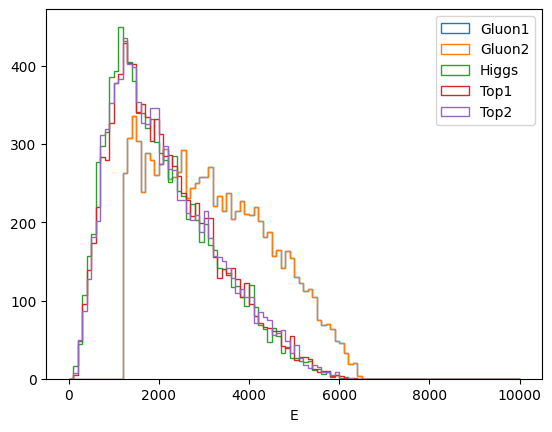

In [32]:
plt.hist(momenta[:,0,0], bins=100, range=(0,1e4), histtype="step", label="Gluon1")
plt.hist(momenta[:,1,0], bins=100, range=(0,1e4), histtype="step", label="Gluon2")
plt.hist(momenta[:,2,0], bins=100, range=(0,1e4), histtype="step", label="Higgs")
plt.hist(momenta[:,3,0], bins=100, range=(0,1e4), histtype="step", label="Top1")
plt.hist(momenta[:,4,0], bins=100, range=(0,1e4), histtype="step", label="Top2")
plt.legend()
plt.xlabel("E")

In [35]:
x1

tensor([0.0615, 0.4713, 0.6466,  ..., 0.7913, 0.6924, 0.9968])

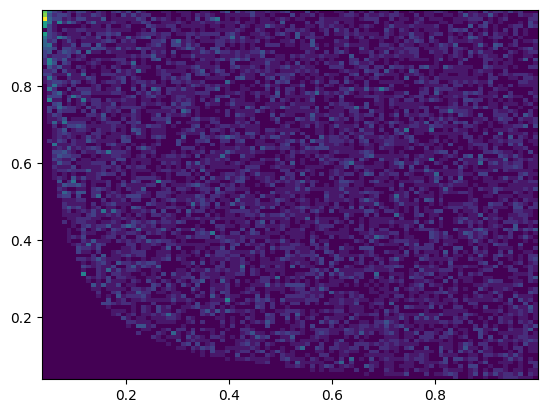

In [38]:
plt.hist2d(x1.numpy(), x2.numpy(), bins=100);

In [40]:
momenta

tensor([[[ 1254.9326,     0.0000,     0.0000,  1254.9326],
         [ 1254.9326,     0.0000,     0.0000, -1254.9326],
         [ 1149.0980,   254.8898,    27.9861, -1113.0978],
         [  642.9193,  -143.4671,  -337.7353,   498.9399],
         [  717.8480,  -111.4228,   309.7492,   614.1579]],

        [[ 2921.5903,     0.0000,     0.0000,  2921.5903],
         [ 2921.5903,     0.0000,     0.0000, -2921.5903],
         [ 1543.9388,   116.3857,  -443.1008,  1469.0730],
         [ 2741.7339, -1446.0674,   763.1809, -2194.0357],
         [ 1557.5081,  1329.6816,  -320.0801,   724.9627]],

        [[ 4522.2393,     0.0000,     0.0000,  4522.2393],
         [ 4522.2393,     0.0000,     0.0000, -4522.2393],
         [ 1282.9074,    34.8249,  1255.8140,  -227.7767],
         [ 4142.4771,   591.2962, -1598.7515,  3771.5677],
         [ 3619.0945,  -626.1211,   342.9374, -3543.7910]],

        ...,

        [[ 4346.9551,     0.0000,     0.0000,  4346.9551],
         [ 4346.9551,     0.0000,   

# Go back from momenta and x1 x2 to phasespace points

In [ ]:
r = phasespace.get_ps_from_momenta(momenta, x1, x2)  #get from partons and 

In [ ]:
plt.hist(points_out - r, bins=100, range=(-1e-4, 1e-4))

In [60]:
r

tensor([[0.0734, 0.0128, 0.0174,  ..., 0.7399, 0.0262, 0.0436],
        [0.7153, 0.9773, 0.7909,  ..., 0.4436, 0.4514, 0.3812],
        [0.9255, 0.4108, 0.2456,  ..., 0.8408, 0.6334, 0.7337],
        ...,
        [0.5718, 0.4071, 0.1568,  ..., 0.9567, 0.7834, 0.5444],
        [0.3047, 0.6267, 0.4960,  ..., 0.2691, 0.6809, 0.6813],
        [0.0893, 0.2457, 0.0416,  ..., 0.5648, 0.9967, 0.2434]])